## PyTorch & Neural Network 
* **PyTorch**: is a popular open-source machine learning framework primarily used for building and training neural networks.
* **neural network** is a powerful machine learning model that learns to perform a task by adjusting the strengths of the connections between its neurons, allowing it to capture complex patterns in data and make accurate predictions or classifications.

The key steps are:

1. Download Prepare the data
2. Define the model architecture
3. Train the model
4. Save the trained model
5. Evaluate the model on the test set
6. Visualize the model predictions


CNN Part :


1. Define the CNN Model:
2. CNN architecture for the MNIST dataset
3. Create the Model, Loss Function, and Optimizer
4. Train CNN model on the MNIST dataset
5. Training the CNN model, evaluate its performance on the test dataset
6. Plot The Results

In [49]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import torchvision
from torchvision import datasets, transforms
import numpy as np
import torch.nn.functional as F
import torch.optim as optim
import seaborn as sns



### Download and Prepare the MNIST Dataset

In [50]:

# Download and preprocess the MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

train_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=64, shuffle=False)

The `MNIST dataset` is a popular dataset for handwritten digit recognition, commonly used in machine learning and computer vision tasks. It consists of a large collection of grayscale images of handwritten digits `(0-9`) and their corresponding labels.

The `MNIST dataset` has the following characteristics:

* Size: The MNIST dataset contains a total of 70,000 images, split into 60,000 training images and 10,000 test images.
* Image Size: Each image in the MNIST dataset is a 28x28 pixel grayscale image.
* Labels: Each image is labeled with the digit it represents (0-9).

### Visualize Sample

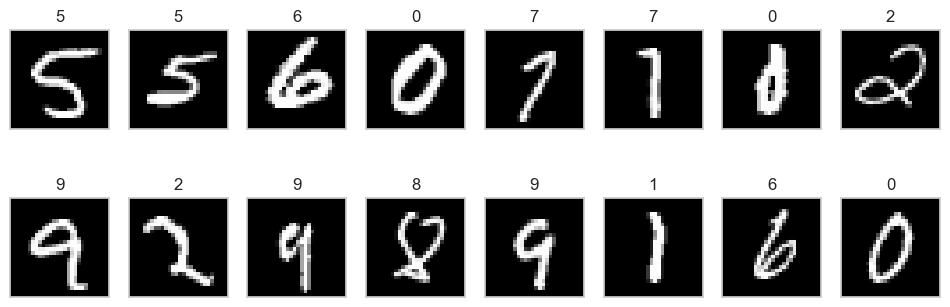

In [51]:

# Get a batch of training data
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Show the first 16 images
fig = plt.figure(figsize=(12, 4))
for i in range(16):
    ax = fig.add_subplot(2, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(images[i].squeeze(), cmap='gray')
    ax.set_title(str(labels[i].item()))
plt.show()

###  Define the Neural Network Model

In [52]:
class MnistNet(nn.Module):
    def __init__(self):
        super(MnistNet, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

### Train The Model:


In [53]:
import torch.optim as optim

model = MnistNet()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 10

for epoch in range(num_epochs):
    running_loss = 0.0
    for i, (inputs, labels) in enumerate(train_loader, 0):
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 100 == 99:
            print(f'[Epoch {epoch + 1}, Batch {i + 1}] Loss: {running_loss / 100:.3f}')
            running_loss = 0.0

            
print('Finished Training')

# Save the trained model
torch.save(model.state_dict(), 'model.pth')

[Epoch 1, Batch 100] Loss: 0.555
[Epoch 1, Batch 200] Loss: 0.270
[Epoch 1, Batch 300] Loss: 0.207
[Epoch 1, Batch 400] Loss: 0.176
[Epoch 1, Batch 500] Loss: 0.154
[Epoch 1, Batch 600] Loss: 0.152
[Epoch 1, Batch 700] Loss: 0.124
[Epoch 1, Batch 800] Loss: 0.115
[Epoch 1, Batch 900] Loss: 0.121
[Epoch 2, Batch 100] Loss: 0.102
[Epoch 2, Batch 200] Loss: 0.078
[Epoch 2, Batch 300] Loss: 0.089
[Epoch 2, Batch 400] Loss: 0.084
[Epoch 2, Batch 500] Loss: 0.089
[Epoch 2, Batch 600] Loss: 0.083
[Epoch 2, Batch 700] Loss: 0.085
[Epoch 2, Batch 800] Loss: 0.086
[Epoch 2, Batch 900] Loss: 0.079
[Epoch 3, Batch 100] Loss: 0.056
[Epoch 3, Batch 200] Loss: 0.058
[Epoch 3, Batch 300] Loss: 0.045
[Epoch 3, Batch 400] Loss: 0.065
[Epoch 3, Batch 500] Loss: 0.059
[Epoch 3, Batch 600] Loss: 0.059
[Epoch 3, Batch 700] Loss: 0.064
[Epoch 3, Batch 800] Loss: 0.063
[Epoch 3, Batch 900] Loss: 0.072
[Epoch 4, Batch 100] Loss: 0.038
[Epoch 4, Batch 200] Loss: 0.034
[Epoch 4, Batch 300] Loss: 0.038
[Epoch 4, 

### Evaluate model


In [54]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total}%')



Accuracy of the network on the 10000 test images: 97%


### Visualize Results

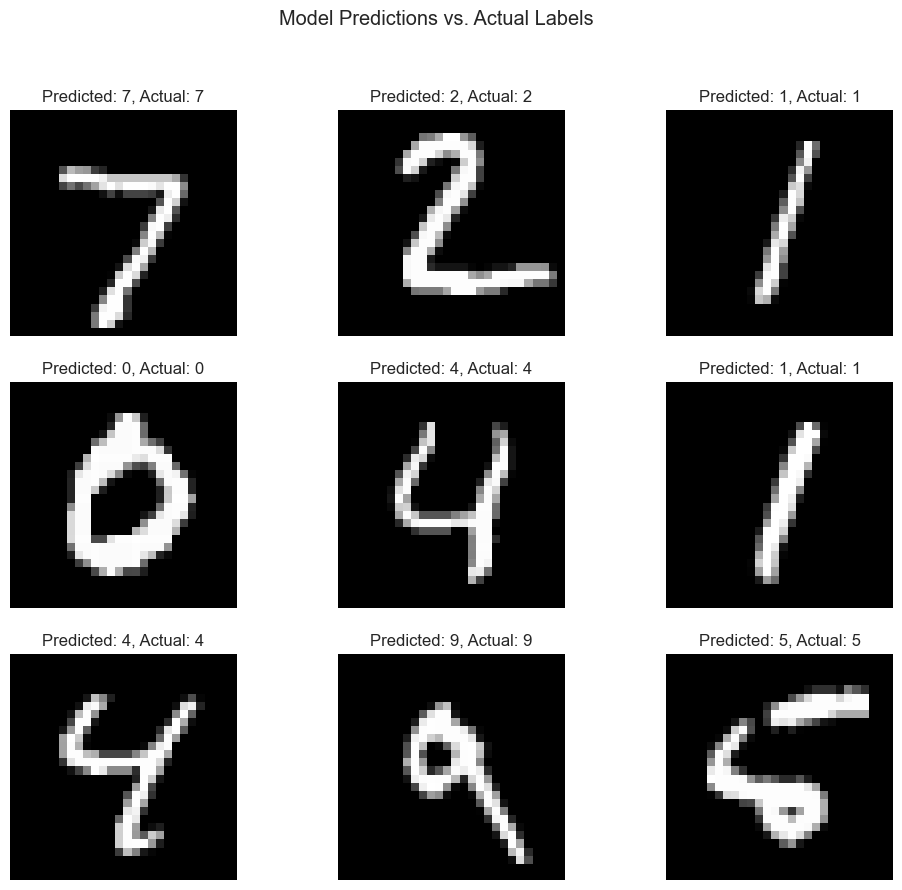

In [55]:
# Visualize the model predictions
dataiter = iter(test_loader)
images, labels = next(dataiter)

with torch.no_grad():
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)

# Set seaborn style
sns.set(style="whitegrid")

# Create a figure with subplots
fig, ax = plt.subplots(3, 3, figsize=(12, 10))

# Plot the first 9 images and their predictions
for i in range(9):
    ax[i // 3, i % 3].imshow(images[i].squeeze(), cmap='gray')
    ax[i // 3, i % 3].set_title(f"Predicted: {predicted[i]}, Actual: {labels[i]}")
    ax[i // 3, i % 3].axis('off')

plt.suptitle('Model Predictions vs. Actual Labels')
plt.show()

## Applying Convolutional Neural Network on MNIST dataset
`CNN` is a model known to be a `Convolutional Neural Network` and in recent times it has gained a lot of popularity because of its usefulness. CNN uses multilayer perceptrons to do computational work. CNN uses relatively little pre-processing compared to other image classification algorithms. This means the network learns through filters that in traditional algorithms were hand-engineered. So, for the image processing tasks, CNNs are the best-suited option.
Applying a Convolutional Neural Network (CNN) on the MNIST dataset is a popular way to learn about and demonstrate the capabilities of CNNs for image classification tasks. The MNIST dataset consists of 28×28 grayscale images of hand-written digits (0-9), with a training set of 60,000 examples and a test set of 10,000 examples.


#### **Here is a basic approach to applying a CNN on the MNIST dataset using the Python programming language and the Keras library:**


### include all necessary libraries

In [88]:
import numpy as np
import keras 
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Dense, Input
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten
from keras import backend as k


2024-08-14 23:33:15.917384: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [89]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


1. Load and preprocess the data: The MNIST dataset can be loaded using the Keras library, and the images can be normalized to have pixel values between 0 and 1

In [90]:
img_rows, img_cols=28, 28

if k.image_data_format() == 'channels_first':
   x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
   x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
   inpx = (1, img_rows, img_cols)

else:
   x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
   x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
   inpx = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255


## Create the train data and test data
* Test data: Used for testing the model that how our model has been trained. 
* Train data: Used to train our model.

In [91]:
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)


2. Define the model architecture: The CNN can be constructed using the Keras Sequential API, which allows for easy building of sequential models layer-by-layer. The architecture should typically include convolutional layers, pooling layers, and fully-connected layers.

In [92]:
inpx = Input(shape=inpx)
layer1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inpx)
layer2 = Conv2D(64, (3, 3), activation='relu')(layer1)
layer3 = MaxPooling2D(pool_size=(3, 3))(layer2)
layer4 = Dropout(0.5)(layer3)
layer5 = Flatten()(layer4)
layer6 = Dense(250, activation='sigmoid')(layer5)
layer7 = Dense(10, activation='softmax')(layer6)


### Explanation of the working of each layer in the CNN model:
* layer1 is the Conv2d layer which convolves the image using 32 filters each of size (3*3). 
* layer2 is again a Conv2D layer which is also used to convolve the image and is using 64 filters each of size (3*3). 
* layer3 is the MaxPooling2D layer which picks the max value out of a matrix of size (3*3). 
* layer4 is showing Dropout at a rate of 0.5. 
* layer5 is flattening the output obtained from layer4 and this flattens output is passed to layer6. 
* layer6 is a hidden layer of a neural network containing 250 neurons. 
* layer7 is the output layer having 10 neurons for 10 classes of output that is using the softmax function.

3. Compile the model: The model needs to be compiled with a loss function, an optimizer, and a metric for evaluation.


4. Train the model: The model can be trained on the training set using the Keras fit() function. It is important to monitor the training accuracy and loss to ensure the model is converging properly.

In [93]:
model = Model([inpx], layer7)
model.compile(optimizer=keras.optimizers.Adadelta(),
              loss=keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=12, batch_size=500)


Epoch 1/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 52s 425ms/step - accuracy: 0.1010 - loss: 2.4707
Epoch 2/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 53s 444ms/step - accuracy: 0.1024 - loss: 2.4572
Epoch 3/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 52s 431ms/step - accuracy: 0.1027 - loss: 2.4394
Epoch 4/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 47s 392ms/step - accuracy: 0.1026 - loss: 2.4306
Epoch 5/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 44s 365ms/step - accuracy: 0.1017 - loss: 2.4167
Epoch 6/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 44s 365ms/step - accuracy: 0.0998 - loss: 2.4060
Epoch 7/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 44s 366ms/step - accuracy: 0.1025 - loss: 2.3906
Epoch 8/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 45s 373ms/step - accuracy: 0.1003 - loss: 2.3812
Epoch 9/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 44s 370ms/step - accuracy: 0.1041 - loss: 2.3656
Epoch 10/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 44s 366ms/step - accuracy: 0.1013 - loss: 2.3586
Epoch 11/12
120/120 ━━━━━━━━━━━━━━━━━━━━ 44s 365ms/step - accuracy: 0.1027 - loss: 2.3472
Epoch 12/12
120/120

5. Evaluate the model: The trained model can be evaluated on the test set using the Keras evaluate() function. The evaluation metric typically used for classification tasks is accuracy.

In [94]:
score = model.evaluate(x_test, y_test, verbose=0)
print('loss=', score[0])
print('accuracy=', score[1])


loss= 2.32639479637146
accuracy= 0.10100000351667404
